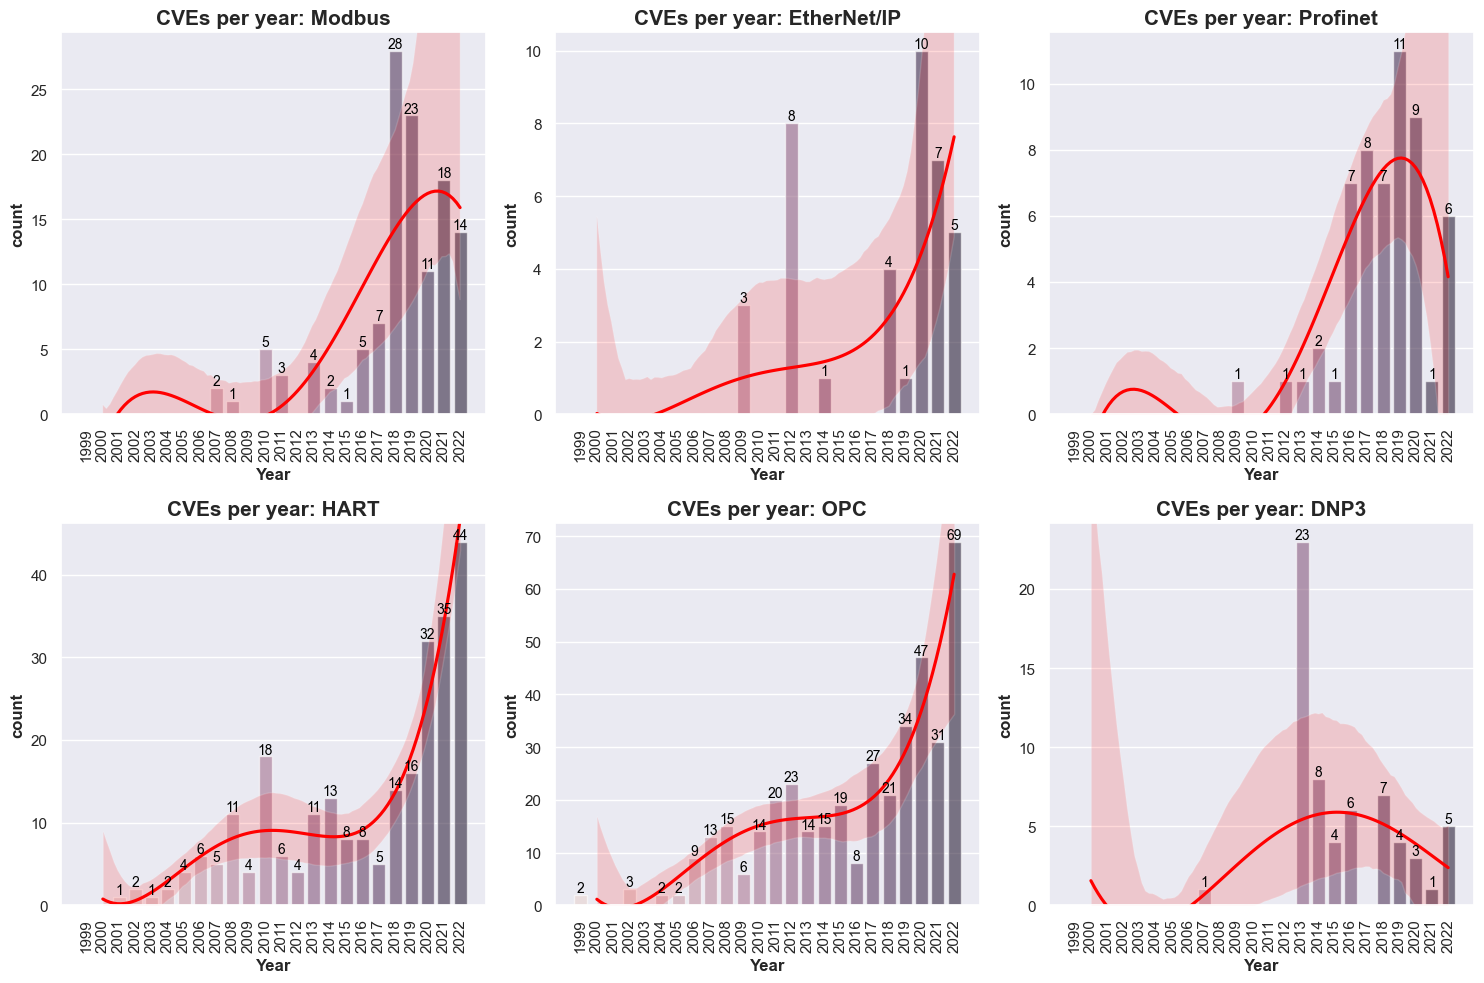

In [8]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import numpy as np

ROOT = Path.cwd()

# Connect to your SQLite database
conn = sqlite3.connect(os.path.join(ROOT, 'Logs', 'cve_database.sqlite3'))


query = "SELECT * FROM CVEs WHERE category = 'industrial_protocols' AND company not in ('CAN', 'Fieldbus', 'Profibus')"
df = pd.read_sql_query(query, conn)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
years = range(1999, 2023)
all_years = pd.DataFrame({'year': years})


# Get unique search terms from the dataframe
unique_search_terms = df['company'].unique()

# Calculate the number of rows and columns for the sub-plots (2 x 3)
num_terms = len(unique_search_terms)
num_cols = min(3, num_terms)  # Maximum 3 columns
num_rows = (num_terms + num_cols - 1) // num_cols

# Create a color palette for the plots
palette = sns.color_palette("Set3", n_colors=num_terms)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through the companies and create sub-plots
for idx, company in enumerate(unique_search_terms, 1):
    row = (idx - 1) // num_cols
    col = (idx - 1) % num_cols

    # Select the current axis
    ax = axes[row, col]

    company_df = df[df['company'] == company]
    company_df = company_df.drop('category', axis=1)
    company_df = all_years.merge(company_df, on='year', how='left').fillna(0)
    df_trend = company_df[(company_df['year'] >= 2000)]
    years_numeric_trend = np.arange(len(company_df))[(company_df['year'] >= 2000)]

    # Plot on the current axis with custom color
    sns.set_theme(style='darkgrid', palette="flare")
    sns.barplot(x='year', y='count', hue='year', data=company_df, ax=ax, alpha=.6, legend=False)
    # Annotate each bar with its count
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=10, color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')
    ax.set_title(f'CVEs per year: {company}', fontsize=15, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('CVE Count', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(bottom=0)
    # Add quadratic trend line using regplot
    sns.regplot(x=years_numeric_trend, y=df_trend['count'], scatter=False, color='red', order=4, ax=ax)  # Added ax=ax here


# Hide any remaining empty sub-plots
for i in range(num_terms, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

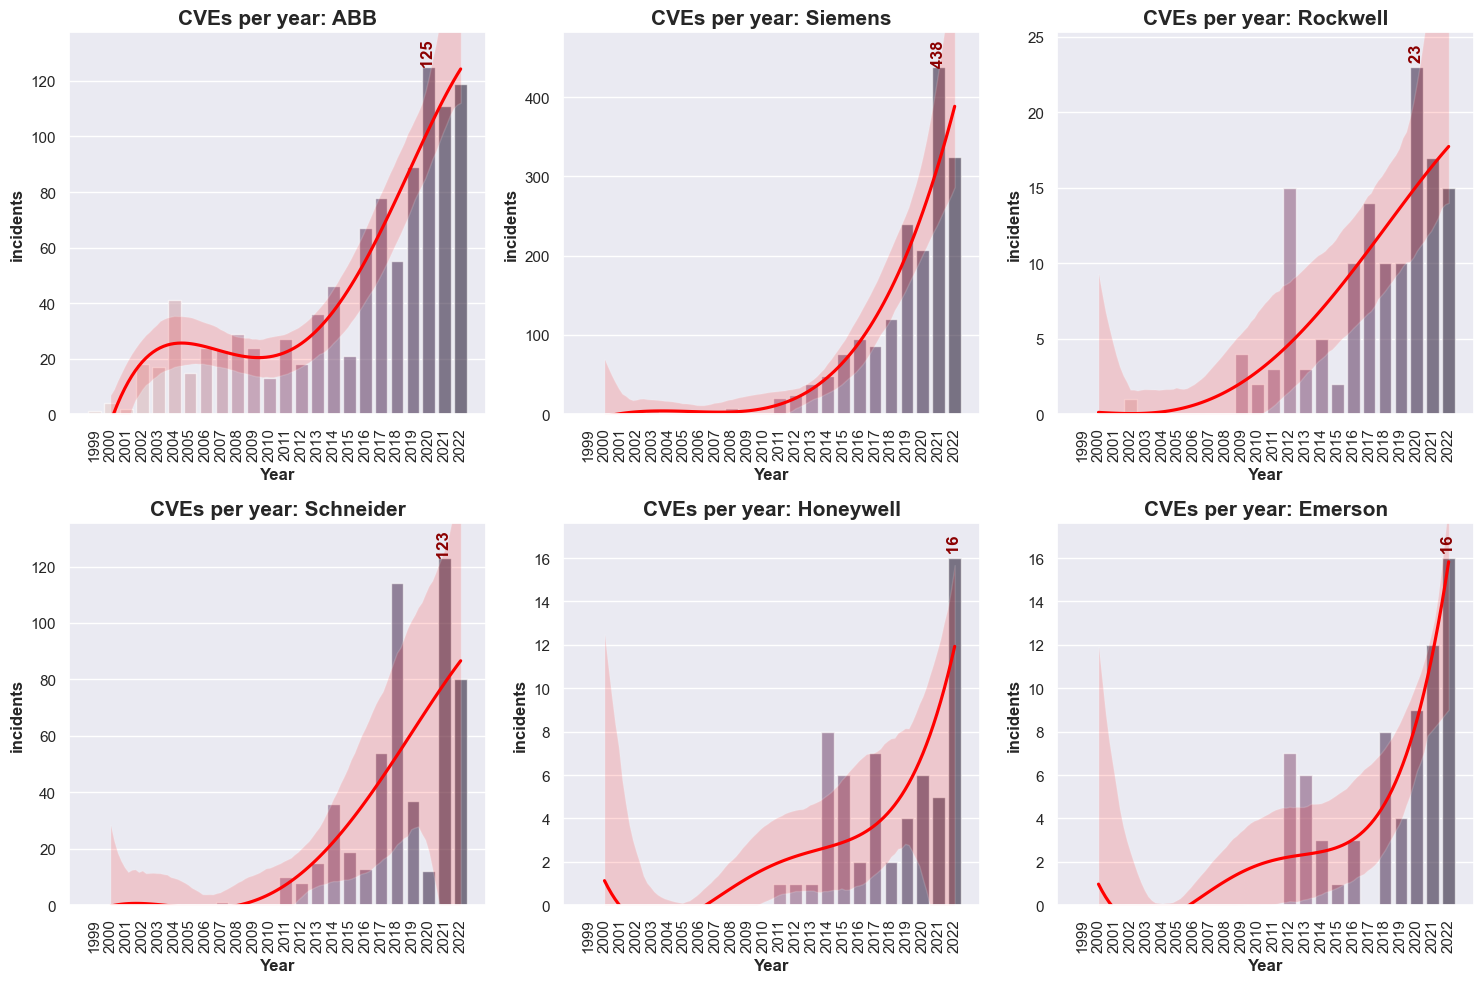

In [13]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

ROOT = Path.cwd()

# Connect to your SQLite database
conn = sqlite3.connect(os.path.join(ROOT, 'Logs', 'cve_database.sqlite3'))


query = "SELECT * FROM incidents WHERE category = 'companies' and search_term not in ('GE', 'Yokogawa')"
df = pd.read_sql_query(query, conn)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
years = range(1999, 2023)
all_years = pd.DataFrame({'year': years})
df = all_years.merge(df, on='year', how='left').fillna(0)

# Get unique search terms from the dataframe
unique_search_terms = df['search_term'].unique()

# Calculate the number of rows and columns for the sub-plots (2 x 3)
num_terms = len(unique_search_terms)
num_cols = min(3, num_terms)  # Maximum 3 columns
num_rows = (num_terms + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through the companies and create sub-plots
for idx, company in enumerate(unique_search_terms, 1):
    row = (idx - 1) // num_cols
    col = (idx - 1) % num_cols

    # Select the current axis
    ax = axes[row, col]

    company_df = df[df['search_term'] == company]
    company_df = company_df.drop('category', axis=1)
    company_df = all_years.merge(company_df, on='year', how='left').fillna(0)
    df_trend = company_df[(company_df['year'] >= 2000)]
    years_numeric_trend = np.arange(len(company_df))[(company_df['year'] >= 2000)]
    
    
    # Plot on the current axis with custom color
    sns.set_theme(style='darkgrid', palette="flare")
    sns.barplot(x='year', y='incidents', hue='year', data=company_df, ax=ax, alpha=.6, legend=False)
    max_patch = max(ax.patches, key=lambda p: p.get_height())
    height = int(max_patch.get_height())
    ax.annotate(f'   {height}', 
            (max_patch.get_x() + max_patch.get_width() / 2., max_patch.get_height()), 
            ha='center', va='center', 
            fontsize=12, color='darkred', rotation=90,
            fontweight='bold',
            xytext=(0, 5), 
            textcoords='offset points')
    ax.set_title(f'CVEs per year: {company}', fontsize=15, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('CVE Count', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    max_count = company_df['incidents'].max()
    ax.set_ylim(0, max_count + 0.1*max_count)
    sns.regplot(x=years_numeric_trend, y=df_trend['incidents'], scatter=False, color='red', order=4, ax=ax)
    

# Hide any remaining empty sub-plots
for i in range(num_terms, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

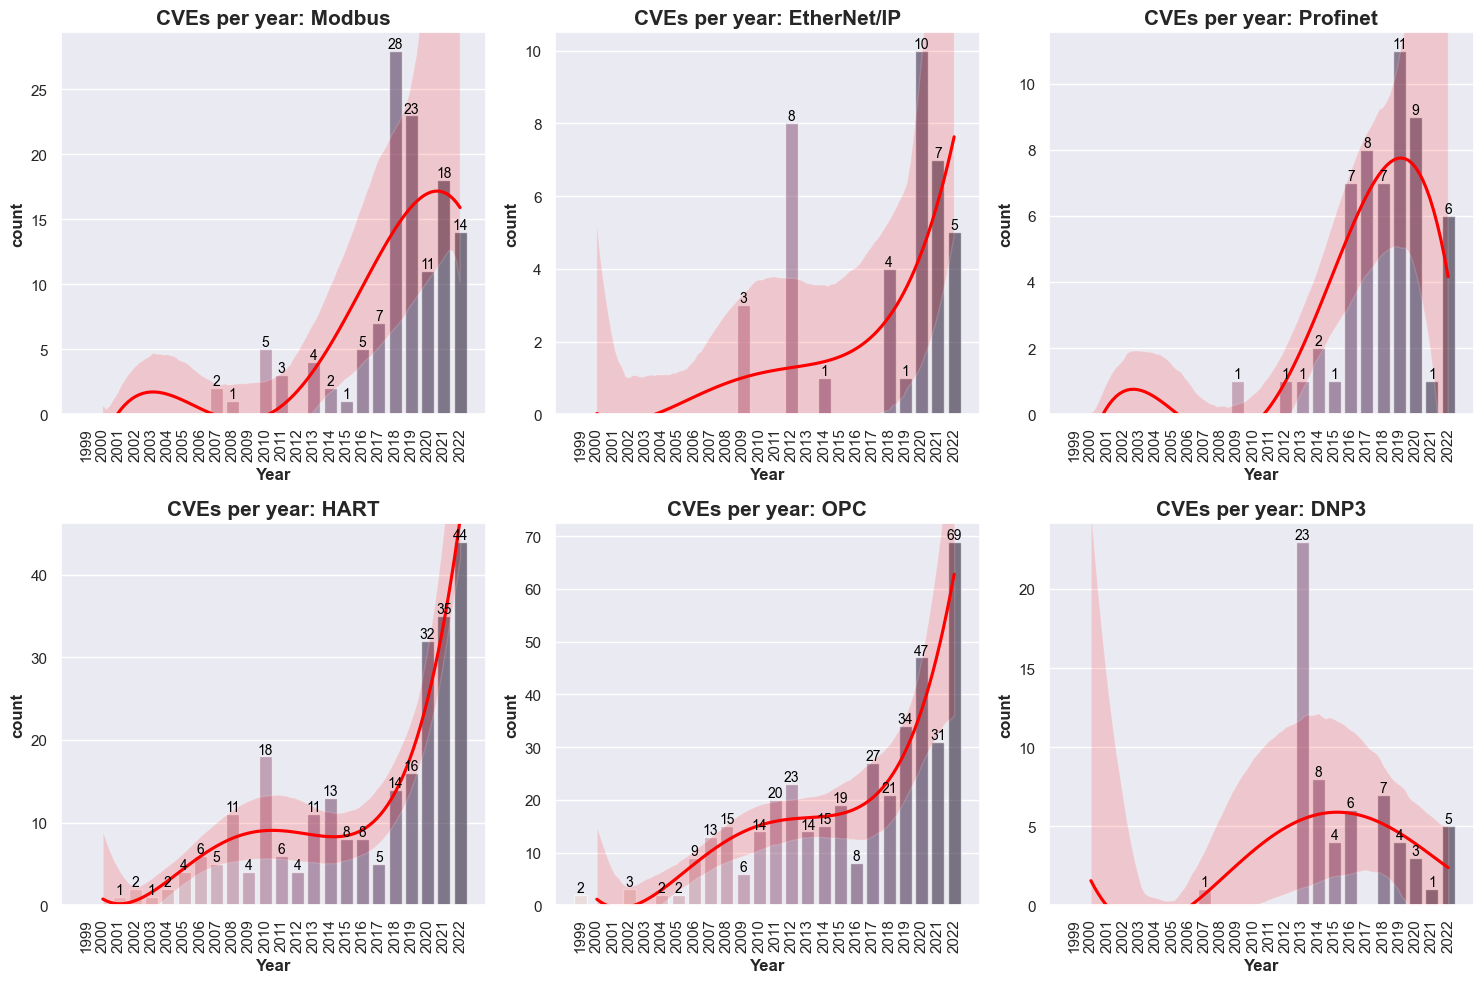

In [14]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path

ROOT = Path.cwd()

# Connect to your SQLite database
conn = sqlite3.connect(os.path.join(ROOT, 'Logs', 'cve_database.sqlite3'))


query = "SELECT * FROM CVEs WHERE category = 'industrial_protocols' AND company not in ('CAN', 'Fieldbus', 'Profibus')"
df = pd.read_sql_query(query, conn)
df['year'] = pd.to_numeric(df['year'], errors='coerce')
years = range(1999, 2023)
all_years = pd.DataFrame({'year': years})


# Get unique search terms from the dataframe
unique_search_terms = df['company'].unique()

# Calculate the number of rows and columns for the sub-plots (2 x 3)
num_terms = len(unique_search_terms)
num_cols = min(3, num_terms)  # Maximum 3 columns
num_rows = (num_terms + num_cols - 1) // num_cols

# Create a color palette for the plots
palette = sns.color_palette("Set3", n_colors=num_terms)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Loop through the companies and create sub-plots
for idx, company in enumerate(unique_search_terms, 1):
    row = (idx - 1) // num_cols
    col = (idx - 1) % num_cols

    # Select the current axis
    ax = axes[row, col]

    company_df = df[df['company'] == company]
    company_df = company_df.drop('category', axis=1)
    company_df = all_years.merge(company_df, on='year', how='left').fillna(0)
    df_trend = company_df[(company_df['year'] >= 2000)]
    years_numeric_trend = np.arange(len(company_df))[(company_df['year'] >= 2000)]

    # Plot on the current axis with custom color
    sns.set_theme(style='darkgrid', palette="flare")
    sns.barplot(x='year', y='count', hue='year', data=company_df, ax=ax, alpha=.6, legend=False)
    # Annotate each bar with its count
    for p in ax.patches:
        height = int(p.get_height())
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='center', 
                        fontsize=10, color='black', 
                        xytext=(0, 5), 
                        textcoords='offset points')
    max_count = company_df['count'].max()
    ax.set_title(f'CVEs per year: {company}', fontsize=15, fontweight='bold')
    ax.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax.set_ylabel('CVE Count', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylim(bottom=0)
    # Add quadratic trend line using regplot
    sns.regplot(x=years_numeric_trend, y=df_trend['count'], scatter=False, color='red', order=4, ax=ax)  # Added ax=ax here


# Hide any remaining empty sub-plots
for i in range(num_terms, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


# Adapted from Waterfall presentation
This was presented at the CS4CA - Asia 2023 in Singapore by  



In [15]:
import pandas as pd

data = {
    2010: {'count': 1, 'notable': 'Stuxnet'},
    2011: {'count': 0},
    2012: {'count': 1, 'notable': 'Iranian oil terminal'},
    2013: {'count': 0},
    2014: {'count': 1, 'notable': 'German steel mill'},
    2015: {'count': 1, 'notable': 'Ukraine power outage x 8 hours'},
    2016: {'count': 1, 'notable': 'Kyev power outage x 1 hour'},
    2017: {'count': 4, 'notable': 'Triton, 1 site x 2 shutdowns'},
    2018: {'count': 1, 'notable': 'TSMC - 3% annual revenue loss'},
    2019: {'count': 4, 'notable': 'USA gas pipeline outage x 30 hours'},
    2020: {'count': 10, 'notable': 'Bluescope Steel - Australian plants'},
    2021: {'count': 22, 'notable': 'Colonial pipeline - 6 day outage'},
    2022: {'count': 53, 'notable': 'Khuzestan Steel - fire in the plant'},
    2023: {'count': 110, 'notable': 'Projected by Waterfall Security'}
}

df = pd.DataFrame.from_dict(data, orient='index')
full_index = range(2000, 2024)
df = df.reindex(full_index).fillna({'count': 0, 'notable': ''})


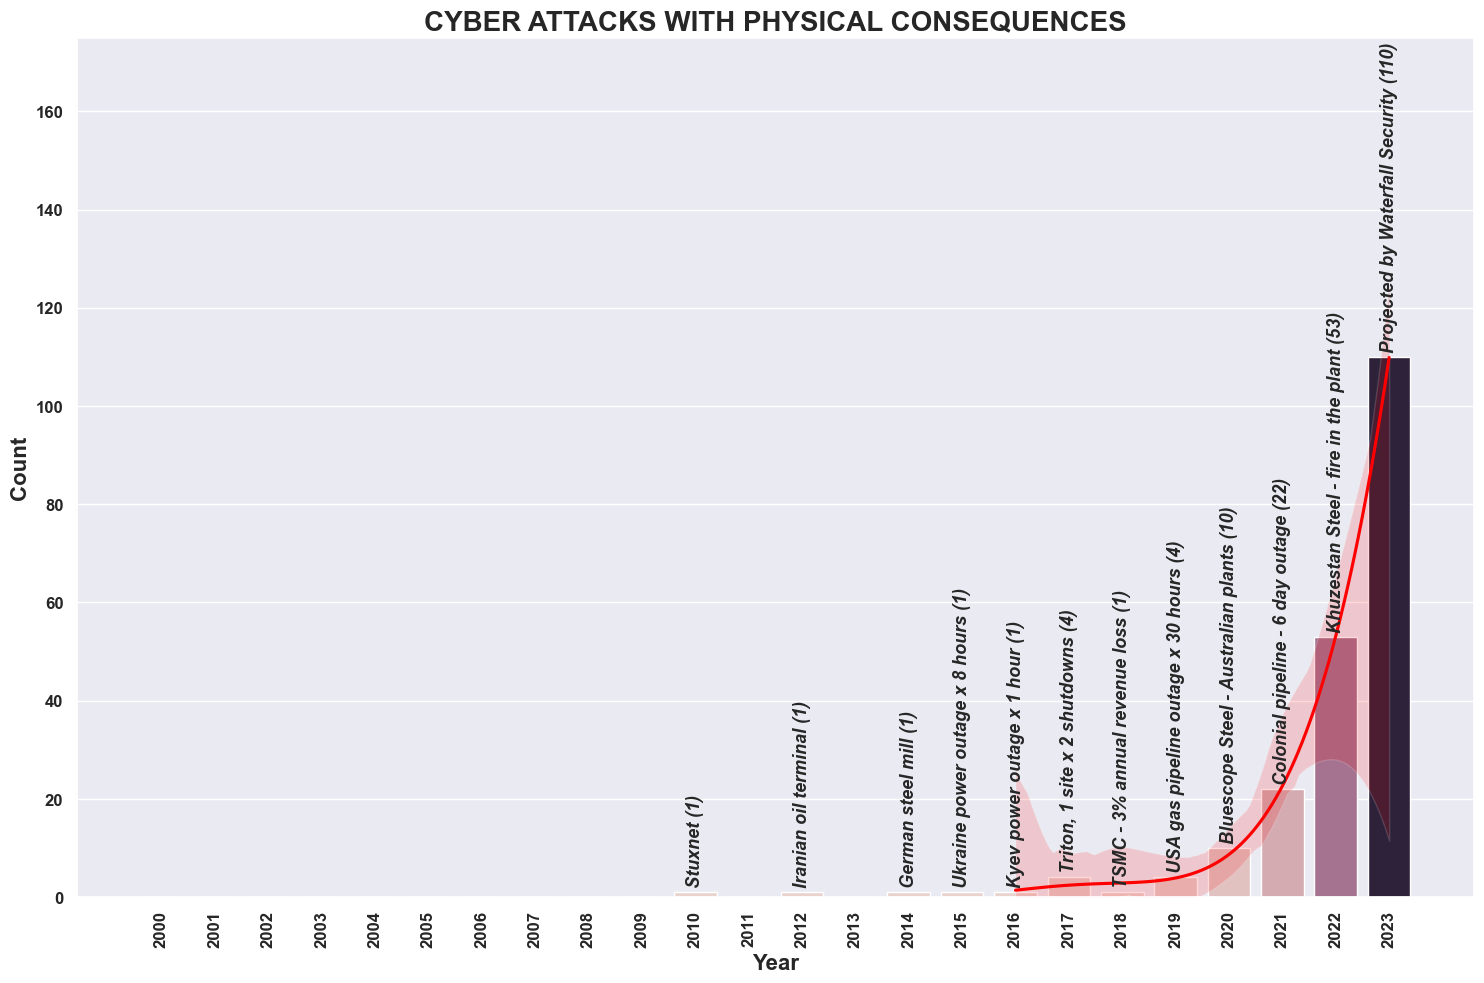

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 10))
sns.set_theme(style='darkgrid', palette="dark")

# Bar plot
sns.barplot(x=df.index, y='count', hue='count', data=df, legend=False, dodge=False)

# Filter the data to start from 2016 and use non-zero counts for the trend
df_trend = df[(df.index >= 2016)]
years_numeric_trend = np.arange(len(df))[(df.index >= 2016) ]

# Add quadratic trend line using regplot
sns.regplot(x=years_numeric_trend, y=df_trend['count'], scatter=False, color='red', order=4)

# Annotate and format plot
plt.xlabel('Year', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.title('CYBER ATTACKS WITH PHYSICAL CONSEQUENCES', fontsize=20, fontweight='bold')
plt.xticks(ticks=np.arange(len(df)), labels=df.index, rotation=90, fontsize=12, fontweight='bold')
max_count = df['count'].max()
plt.yticks(fontsize=12,fontweight='bold')
plt.ylim(0, max_count + 65)

# Adding the 'notable' texts with count
for year, (notable, count) in df[['notable', 'count']].iterrows():
    if notable:
        label = f"{notable} ({int(count)})"
        plt.text(year - 2000, count + 1, label, rotation=90, ha='center', va='bottom', fontweight='bold', fontsize=13, fontstyle='italic')

plt.tight_layout()
plt.show()
